Epoch 1/50


/Users/sam/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.3566 - val_loss: 0.2448
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2047 - val_loss: 0.1353
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1296 - val_loss: 0.0850
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0832 - val_loss: 0.1363
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0907 - val_loss: 0.1344
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0826 - val_loss: 0.0987
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0727 - val_loss: 0.0864
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0761 - val_loss: 0.0845
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0758 - val_loss: 0.0845
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0781 - val_loss: 0.0853
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0810 - val_loss: 0.0876
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0836 - val_loss: 0.0908
Epoch 13/50
4/4 ━━━━━━

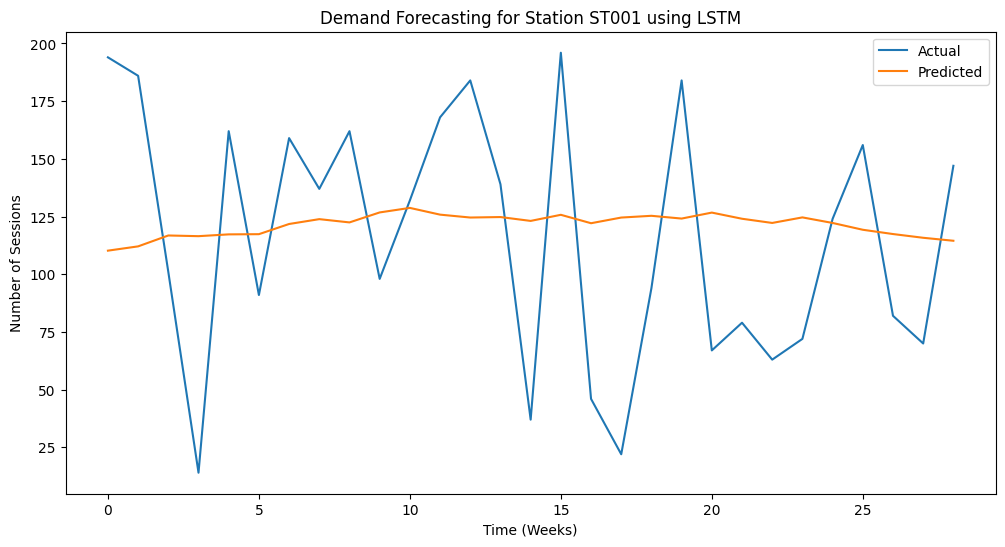

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset
df = pd.read_csv('/Users/Sam/Downloads/EV_Charging_Data_Week_Number.csv')

# Select features and target
features = ['Number of Sessions', 'Utilization Rate', 'Electricity Consumed (kWh)', 
            'Number of EVs', 'Growth Rate (%)']
target = 'Number of Sessions'

# Normalize data
scaler = MinMaxScaler()
df[features + [target]] = scaler.fit_transform(df[features + [target]])

# Prepare data for a specific station (e.g., ST001)
station_id = 'ST001'
df_station = df[df['Station ID'] == station_id].reset_index(drop=True)

# Sliding window: Use past 12 weeks to predict next week
def create_sequences(data, input_steps, output_steps):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:i+input_steps, :-1])
        y.append(data[i+input_steps:i+input_steps+output_steps, -1])
    return np.array(X), np.array(y)

input_steps = 12  # Past 12 weeks
output_steps = 1  # Predict next 1 week
data = df_station[features + [target]].values
X, y = create_sequences(data, input_steps, output_steps)

# Split into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(input_steps, len(features)), return_sequences=False),
    Dense(output_steps)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_test_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((y_test.shape[0], len(features))), y_test])
)[:, -1]
y_pred_rescaled = scaler.inverse_transform(
    np.hstack([np.zeros((y_pred.shape[0], len(features))), y_pred])
)[:, -1]

# Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")

# Plot results
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.title(f"Demand Forecasting for Station {station_id} using LSTM")
plt.xlabel("Time (Weeks)")
plt.ylabel("Number of Sessions")
plt.legend()
plt.show()



In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 239.4 MB 18.9 MB/s eta 0:00:01     |███████████████████████████████▏| 232.8 MB 18.9 MB/s eta 0:00:01
     |████████████████████████████████| 71 kB 2.8 MB/s s eta 0:00:01
     |████████████████████████████████| 5.5 MB 19.8 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 12.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 30.1 MB/s eta 0:00:01
     |████████████████████████████████| 396 kB 19.4 MB/s eta 0:00:01
     |████████████████████████████████| 25.8 MB 15.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.1 MB 15.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.5 MB 15.1 MB/s eta 0:00:01
     |████████████████████████████████| 417 kB 19.0 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 18.1 MB/s eta 0:00:01
     |███████████████

Epoch 1/50


/Users/sam/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step - loss: 0.4780 - val_loss: 0.2979
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.4315 - val_loss: 0.2665
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3970 - val_loss: 0.2366
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3606 - val_loss: 0.2079
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3312 - val_loss: 0.1810
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.2901 - val_loss: 0.1558
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.2800 - val_loss: 0.1320
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2465 - val_loss: 0.1108
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2167 - val_loss: 0.0921
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2042 - val_loss: 0.0756
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1817 - val_loss: 0.0615
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.1466 - val_loss: 0.0501
Epoch 13/50

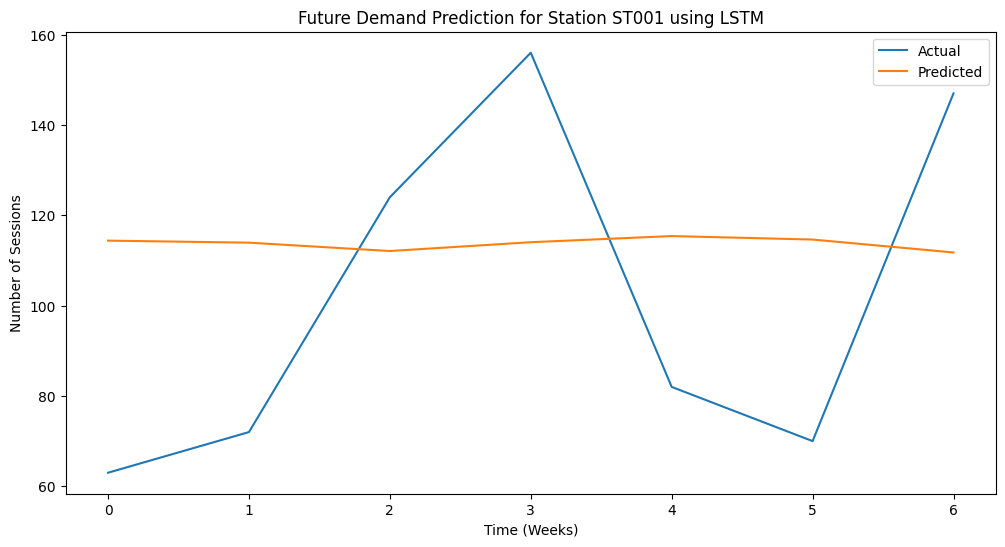

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Users/Sam/Downloads/EV_Charging_Data_Week_Number.csv')

# Select a specific station to analyze (e.g., ST001)
station_id = 'ST001'
df_station = df[df['Station ID'] == station_id].reset_index(drop=True)

# Features and target for prediction
features_to_scale = ['Number of Sessions', 'Electricity Consumed (kWh)', 'Duration of Use']
other_features = ['Utilization Rate', 'Growth Rate (%)']
target = 'Number of Sessions'

# Scale only 'Number of Sessions', 'Electricity Consumed (kWh)', and 'Duration of Use'
scaler = MinMaxScaler()
df_station[features_to_scale] = scaler.fit_transform(df_station[features_to_scale])

# Combine scaled and unscaled features
features = features_to_scale + other_features

# Create sequences for LSTM
def create_sequences(data, input_steps, output_steps):
    X, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        X.append(data[i:i+input_steps, :])  # Features
        y.append(data[i+input_steps:i+input_steps+output_steps, 0])  # Target (Number of Sessions)
    return np.array(X), np.array(y)

# Prepare data for modeling
input_steps = 125  # Use past 125 weeks
output_steps = 1   # Predict next week
data = df_station[features].values
X, y = create_sequences(data, input_steps, output_steps)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', input_shape=(input_steps, len(features)), return_sequences=False),
    Dropout(0.2),
    Dense(output_steps)
])
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Make predictions
y_pred = model.predict(X_test)

# Rescale predictions and actual values back to original scale
y_test_rescaled = scaler.inverse_transform(
    np.hstack([y_test, np.zeros((y_test.shape[0], len(features_to_scale) - 1))])
)[:, 0]
y_pred_rescaled = scaler.inverse_transform(
    np.hstack([y_pred, np.zeros((y_pred.shape[0], len(features_to_scale) - 1))])
)[:, 0]

# Evaluate the model
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
print(f"Mean Squared Error: {mse}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="Actual")
plt.plot(y_pred_rescaled, label="Predicted")
plt.title(f"Future Demand Prediction for Station {station_id} using LSTM")
plt.xlabel("Time (Weeks)")
plt.ylabel("Number of Sessions")
plt.legend()
plt.show()


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 02, Dec, 2024
Time:                     12:20:01
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    27.0196
Nobs:                     112.000    HQIC:                   22.6202
Log likelihood:          -1588.13    FPE:                6.40283e+08
AIC:                      19.6165    Det(Omega_mle):     7.28168e+07
--------------------------------------------------------------------
Results for equation Number of Sessions
                                    coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------------
const                                 -4.355916       123.074456           -0.035           0.972
L1.Number of Sessions                 -0.058949         0.134480           -0

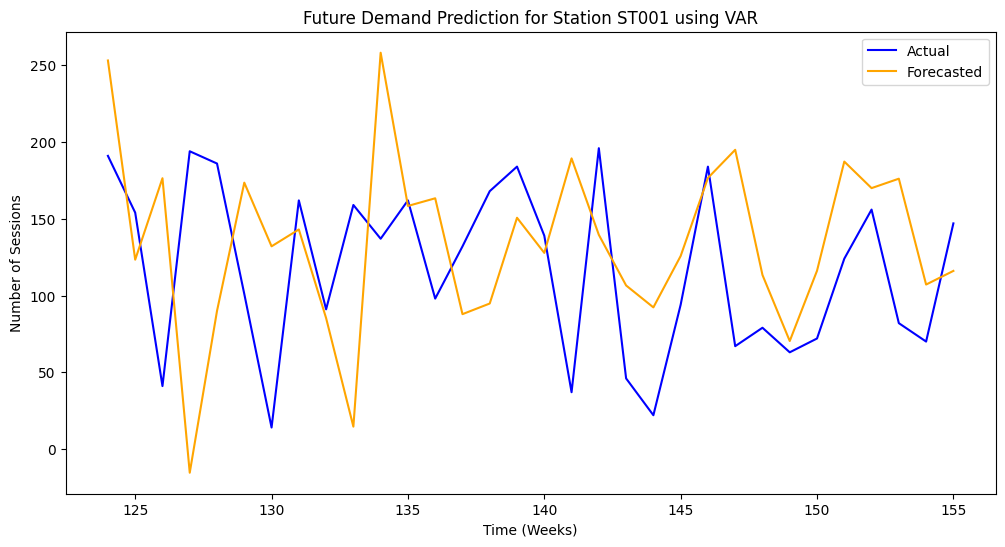

In [8]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('/Users/Sam/Downloads/EV_Charging_Data_Week_Number.csv')

# Select a specific station (e.g., ST001) for analysis
station_id = 'ST001'
df_station = df[df['Station ID'] == station_id].reset_index(drop=True)

# Select features for VAR model
features = ['Number of Sessions', 'Electricity Consumed (kWh)', 'Duration of Use', 
            'Utilization Rate', 'Growth Rate (%)']

# Keep only the relevant features
df_features = df_station[features]

# Split the data into training and testing sets
train_size = int(len(df_features) * 0.8)  # Use 80% for training
train, test = df_features[:train_size], df_features[train_size:]

# Fit the VAR model
model = VAR(train)
fitted_model = model.fit(maxlags=12)  # Use up to 12 lags (adjust based on your data)

# Print model summary
print(fitted_model.summary())

# Forecast future values
forecast_steps = len(test)  # Forecast for the test period
forecast = fitted_model.forecast(y=train.values, steps=forecast_steps)

# Convert forecasted values to a DataFrame
forecast_df = pd.DataFrame(forecast, index=test.index, columns=test.columns)

# Calculate Mean Squared Error for 'Number of Sessions'
mse = mean_squared_error(test['Number of Sessions'], forecast_df['Number of Sessions'])
print(f"Mean Squared Error (Number of Sessions): {mse}")

# Plot actual vs predicted for 'Number of Sessions'
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Number of Sessions'], label="Actual", color="blue")
plt.plot(test.index, forecast_df['Number of Sessions'], label="Forecasted", color="orange")
plt.title(f"Future Demand Prediction for Station {station_id} using VAR")
plt.xlabel("Time (Weeks)")
plt.ylabel("Number of Sessions")
plt.legend()
plt.show()


Forecast for future weeks (157-169):
     Number of Sessions  Electricity Consumed (kWh)  Duration of Use  \
157           65.137654                 6308.634304      2439.379778   
158           92.028323                 5908.502621      2171.996808   
159          121.009960                 7725.340134      2364.857689   
160          169.481554                 6401.902538      2819.536811   
161          172.432096                 7288.858783      2608.755786   
162           97.127575                 4905.960491      2713.222671   
163           72.312746                 6471.242133      2956.855960   
164           88.762458                 5557.787888      2725.635880   
165          148.783035                 6568.774613      3017.947618   
166          128.217906                 7217.606531      2656.767999   
167          119.145784                 7355.557557      3124.009660   
168          144.243197                 7333.482971      2764.118115   
169          110.905013    

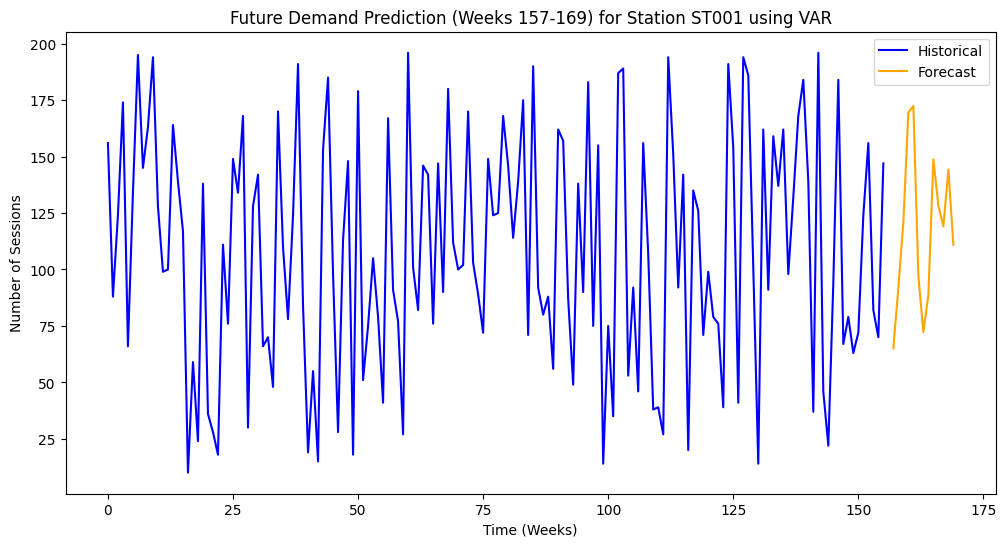

In [9]:
import pandas as pd
from statsmodels.tsa.api import VAR
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/Users/Sam/Downloads/EV_Charging_Data_Week_Number.csv')

# Select a specific station (e.g., ST001) for analysis
station_id = 'ST001'
df_station = df[df['Station ID'] == station_id].reset_index(drop=True)

# Select features for VAR model
features = ['Number of Sessions', 'Electricity Consumed (kWh)', 'Duration of Use', 
            'Utilization Rate', 'Growth Rate (%)']

# Keep only the relevant features
df_features = df_station[features]

# Fit the VAR model on the entire dataset
model = VAR(df_features)
fitted_model = model.fit(maxlags=12)  # Use up to 12 lags (adjust based on data)

# Forecast future values (157-169 weeks)
forecast_steps = 13  # Predict 13 weeks ahead (157-169 weeks)
forecast = fitted_model.forecast(y=df_features.values, steps=forecast_steps)

# Convert forecasted values to a DataFrame
forecast_index = range(157, 157 + forecast_steps)  # Create future weeks index
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=df_features.columns)

# Print forecast results
print("Forecast for future weeks (157-169):")
print(forecast_df)

# Plot future predictions for 'Number of Sessions'
plt.figure(figsize=(12, 6))
plt.plot(df_features['Number of Sessions'], label="Historical", color="blue")
plt.plot(forecast_index, forecast_df['Number of Sessions'], label="Forecast", color="orange")
plt.title(f"Future Demand Prediction (Weeks 157-169) for Station {station_id} using VAR")
plt.xlabel("Time (Weeks)")
plt.ylabel("Number of Sessions")
plt.legend()
plt.show()
